In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

CNOT_matrix=np.array([[1,0,0,0],
                      [0,1,0,0],
                      [0,0,0,1],
                      [0,0,1,0]])
hadamard=(1/(np.sqrt(2)))*np.array([[1, 1],[1,-1]])

swap= np.array([[1,0,0,0],
                [0,0,1,0],
                [0,1,0,0],
                [0,0,0,1]])

identity = np.identity(2)
bell= (np.array([[1],[0],[0],[1]])/np.sqrt(2)).reshape(4,)


# Pure state

Plot 1 (Fidelity vs iteration for a fixed noise)

[0.69171446+0.j         0.        +0.j         0.        +0.j
 0.69171446+0.20751434j]
[array([0.91588593-1.19391407e-18j]), array([0.99163614-1.28704185e-17j]), array([0.96779282+1.42162102e-18j]), array([0.99889373-4.00094977e-18j]), array([0.99559288-1.84684489e-21j]), array([0.99998041+2.33347317e-18j]), array([0.99992162+1.69883973e-21j]), array([0.99999999+9.5957761e-19j])]


c:\Users\manoj\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\manoj\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


([<matplotlib.lines.Line2D at 0x1be945b2fd0>],
 Text(0.5, 0, 'Number of iterations'),
 Text(0, 0.5, 'Fidelity'),
 Text(0.5, 1.0, 'Fidelity vs Number of iterations'))

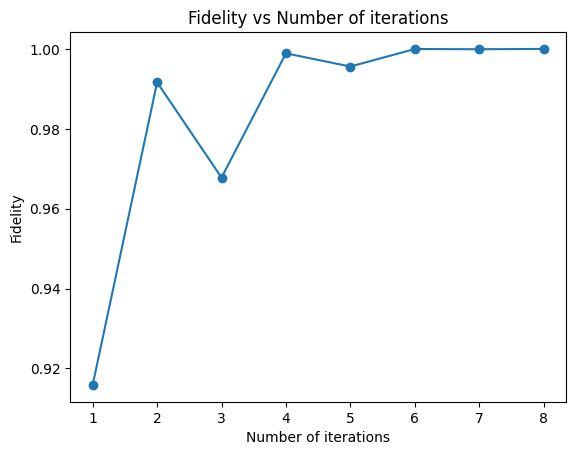

In [3]:
#initializing the state
psi_complex = np.empty(4,dtype=complex)


#taking the input of the state
for i in range(4):
    x=float(input("Element:")) #taking input for the matrix of the state
    
    #taking the input for various values of c

    choice = input("complex or real")
    if choice == "complex":
        real_part = float(input("Enter the real part: "))
        imag_part = float(input("Enter the imaginary part: "))
        psi_complex[i] = complex(real_part, imag_part) * x
        

    elif choice == "real":
        c = float(input("Enter the real coefficient: "))
        psi_complex[i] = complex(c,0) * x
        
        
    else:
        print("Invalid input")
        break

psi_1=(psi_complex.reshape(4,))/np.linalg.norm(psi_complex)

psi_2=psi_1

print(psi_1)

f = []

for j in range(8):

    for i in range(j+1):

        psi = np.kron(psi_1,psi_2)
        

        #performing swap operation 
        swap_tensored =np.kron(identity,np.kron(swap,identity))
        swaped_state= np.matmul(swap_tensored,psi)


        #cnot operation on swapped qubits 
        cnot = np.kron(CNOT_matrix,CNOT_matrix)
        state_after_cnot = np.matmul(cnot,swaped_state)

        #swapping the states back 
        original_psi = np.matmul(swap_tensored,state_after_cnot)

        #hadamard operation 
        tensored_hadamard = np.kron(hadamard,np.kron(hadamard,np.identity(4)))
        final_state_after_hadamard =np.matmul(tensored_hadamard,original_psi)


        #measurement
        projector=np.array([[1,0],[0,0]])
        projector_tensored = np.kron(np.identity(4),np.kron(projector,projector))

        measured = np.dot(projector_tensored,final_state_after_hadamard)


        #tracing out the measured copy
        first_copy_of_the_state = np.trace(measured.reshape(2,2,2,2),axis1=2,axis2=3)


        #creating bell state
        bell_state = (np.array([[1],[0],[0],[1]]) * (1/ np.sqrt(2))).reshape(4,)


        # preparation of density matrix of bell state and psi state by taking the outer product between the states
        density_matrix_bell = np.outer((bell_state),np.conjugate(bell_state)) 

        #dividing by the trace of density matrix to make it 1
        density_matrix_pp = np.outer(first_copy_of_the_state,np.conjugate(first_copy_of_the_state)) / np.trace(np.outer((first_copy_of_the_state),np.conjugate(first_copy_of_the_state)))


        #calculation of fidelity
        x = np.matmul(np.conjugate(bell_state.reshape(1,4)),np.matmul(density_matrix_pp,bell_state))
        fidelity = x

        psi_1 = first_copy_of_the_state.reshape(4,)
        psi_2 = first_copy_of_the_state.reshape(4,)
    
    psi_1 = (psi_complex.reshape(4,))/np.linalg.norm(psi_complex)
    psi_2 = psi_1
    
    f=f+[fidelity]

print(f)      
plt.plot(range(1,9,1),f,marker='o'),plt.xlabel('Number of iterations'),plt.ylabel('Fidelity'),plt.title('Fidelity vs Number of iterations')

Plot 2(Fidelity vs iteration for various noise parameter)

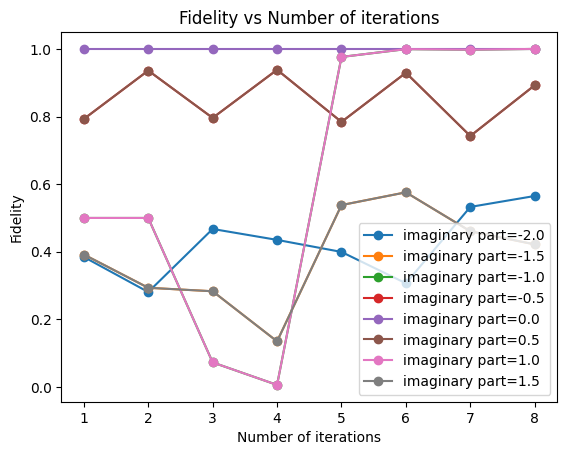

In [5]:
#initializing the state


psi_complex = np.empty(4,dtype=complex)


for w in np.arange(-2,2,0.5):

    imag_part = w
    f=[]
    psi_complex[0] = 1
    psi_complex[1] = 0
    psi_complex[2] = 0 
    psi_complex[3] = complex(real_part, imag_part) * 1
    fidelity = 0
    psi_1=(psi_complex.reshape(4,))/np.linalg.norm(psi_complex)
    psi_2=psi_1

    for i in range(8):

        psi = np.kron(psi_1,psi_2)
        

        #performing swap operation 
        swap_tensored =np.kron(identity,np.kron(swap,identity))
        swaped_state= np.matmul(swap_tensored,psi)


        #cnot operation on swapped qubits 
        cnot = np.kron(CNOT_matrix,CNOT_matrix)
        state_after_cnot = np.matmul(cnot,swaped_state)

        #swapping the states back 
        original_psi = np.matmul(swap_tensored,state_after_cnot)

        #hadamard operation 
        tensored_hadamard = np.kron(hadamard,np.kron(hadamard,np.identity(4)))
        final_state_after_hadamard =np.matmul(tensored_hadamard,original_psi)


        #measurement
        projector=np.array([[1,0],[0,0]])
        projector_tensored = np.kron(np.identity(4),np.kron(projector,projector))

        measured = np.dot(projector_tensored,final_state_after_hadamard)


        #tracing out the measured copy
        first_copy_of_the_state = np.trace(measured.reshape(2,2,2,2),axis1=2,axis2=3)


        #creating bell state
        bell_state = (np.array([[1],[0],[0],[1]]) * (1/ np.sqrt(2))).reshape(4,)


        # preparation of density matrix of bell state and psi state by taking the outer product between the states
        density_matrix_bell = np.outer((bell_state),np.conjugate(bell_state)) 

        #dividing by the trace of density matrix to make it 1
        density_matrix_pp = np.outer(first_copy_of_the_state,np.conjugate(first_copy_of_the_state)) / np.trace(np.outer((first_copy_of_the_state),np.conjugate(first_copy_of_the_state)))


        #calculation of fidelity
        x = np.matmul(np.conjugate(bell_state.reshape(1,4)),np.matmul(density_matrix_pp,bell_state))
        fidelity = x

        psi_1 = first_copy_of_the_state.reshape(4,)
        psi_2 = first_copy_of_the_state.reshape(4,)
        f=f+[fidelity]

    plt.plot(range(1,9,1),f,label=f'imaginary part={w}',marker='o'),plt.legend()   

    # plt.plot(range(8),f,marker='o'),
    plt.xlabel('Number of iterations'),
    plt.ylabel('Fidelity'),
    plt.title('Fidelity vs Number of iterations')
   

Plot 2(fidelity as a fuction of real and imaginary parameter at varying noise for increasing number of iterations)

Text(807.2394636015327, 0.5, 'Im')

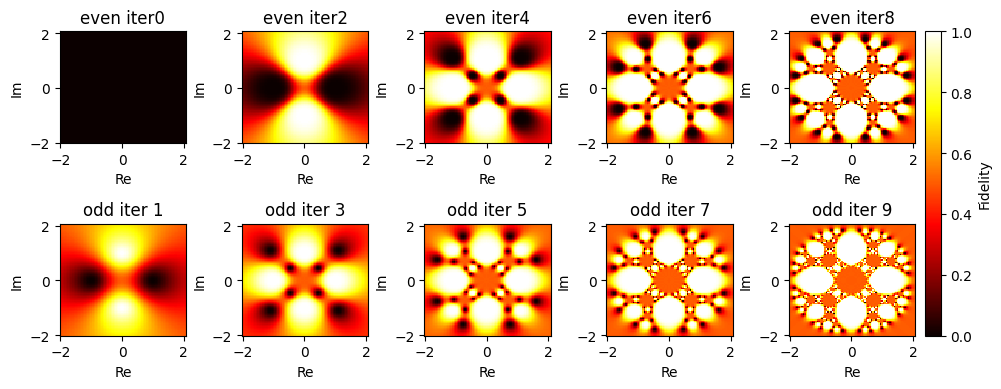

In [9]:
fig, axs = plt.subplots(2, 5,figsize=(11, 4))

#initializing the state
for c in np.arange(10):

    psi_complex = np.empty(4,dtype=complex)
    real = []
    imag = []
    f_even =[]
    f_odd =[]
    fidelity = 0
    fidelity_original_pure = []
    
    for y in np.arange(-2,2.1,0.05):

        real_part = y
        for i in np.arange(-2,2.1,0.05):
            imag_part = i
            psi_complex[0] = 1
            psi_complex[1] = 0
            psi_complex[2] = 0 
            psi_complex[3] = complex(real_part, imag_part) * 1
        

            psi_1=(psi_complex.reshape(4,))/np.linalg.norm(psi_complex)
            psi_2=psi_1

            

            for i in np.arange(c):

                psi = np.kron(psi_1,psi_2)
            

                #performing swap operation 
                swap_tensored =np.kron(identity,np.kron(swap,identity))
                swaped_state= np.matmul(swap_tensored,psi)


                #cnot operation on swapped qubits 
                cnot = np.kron(CNOT_matrix,CNOT_matrix)
                state_after_cnot = np.matmul(cnot,swaped_state)

                #swapping the states back 
                original_psi = np.matmul(swap_tensored,state_after_cnot)

                #hadamard operation 
                tensored_hadamard = np.kron(hadamard,np.kron(hadamard,np.identity(4)))
                final_state_after_hadamard =np.matmul(tensored_hadamard,original_psi)


                #measurement
                projector=np.array([[1,0],[0,0]])
                projector_tensored = np.kron(np.identity(4),np.kron(projector,projector))

                measured = np.dot(projector_tensored,final_state_after_hadamard)


                #tracing out the measured copy
                first_copy_of_the_state = np.trace(measured.reshape(2,2,2,2),axis1=2,axis2=3)


                #creating bell state
                bell_state = (np.array([[1],[0],[0],[1]]) * (1/ np.sqrt(2))).reshape(4,)


                # preparation of density matrix of bell state and psi state by taking the outer product between the states
                density_matrix_bell = np.outer((bell_state),np.conjugate(bell_state)) 

                #dividing by the trace of density matrix to make it 1
                density_matrix_pp = np.outer(first_copy_of_the_state,np.conjugate(first_copy_of_the_state)) / np.trace(np.outer((first_copy_of_the_state),np.conjugate(first_copy_of_the_state)))


                #calculation of fidelity
                x = np.matmul(np.conjugate(bell_state.reshape(1,4)),np.matmul(density_matrix_pp,bell_state))
                fidelity = x

                psi_1 = first_copy_of_the_state.reshape(4,)
                psi_2 = first_copy_of_the_state.reshape(4,)
            
            
            if c%2==0:
                f_even=f_even+[fidelity]
            else:
                f_odd=f_odd+[fidelity]
            
        
            
    y = np.arange(-2, 2.1, 0.05)
    x = np.arange(-2, 2.1, 0.05)
    X, Y = np.meshgrid(x, y)

    if c%2==0:
        F_even = np.array(f_even).reshape(len(y), len(x))

        mesh = axs[0,c//2].pcolormesh(X, Y, np.abs(F_even), cmap='hot', shading='auto', vmin=0, vmax=1)
        axs[0,c//2].set_title(f'even iter{c}')
        axs[0,c//2].set_xlabel('Re')  # Set x-axis label for subplot in the first column
        axs[0,c//2].set_ylabel('Im')  # Set y-axis label for subplot in the first column

        plt.title(f'even iter{c}')
       
    

    
    else:
        F_odd = np.array(f_odd).reshape(len(y), len(x))

        mesh = axs[1,c//2].pcolormesh(X, Y, np.abs(F_odd), cmap='hot', shading='auto', vmin=0, vmax=1)
        axs[1,c//2].set_title(f'odd iter {c}')
        axs[1,c//2].set_xlabel('Re')  # Set x-axis label for subplot in the second column
        axs[1,c//2].set_ylabel('Im')  # Set y-axis label for subplot in the second column
        
        plt.title(f'odd iter {c}')
        
plt.tight_layout()         
cbar = fig.colorbar(mesh, ax=axs.ravel().tolist(), orientation='vertical',pad=0.01)
cbar.set_label('Fidelity')


plt.xlabel('Re')  # Set x-axis label
plt.ylabel('Im')  # Set y-axis label







# Mixed state

Plot 1 (fidelity vs iteration for lamda 0.5)

Plot 2 (Fidelity vs iterations for various lambda)

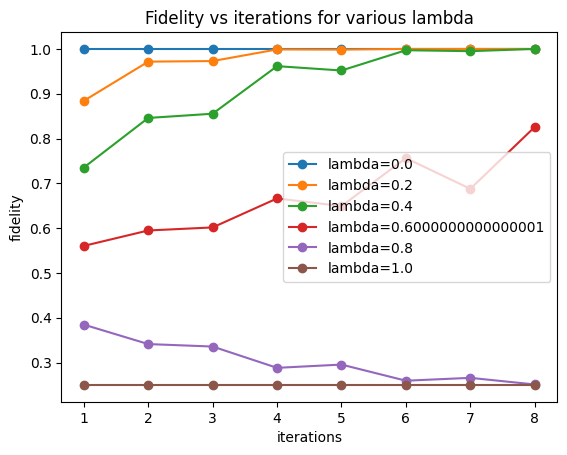

In [7]:

density_matrix_bell = np.outer(bell,np.conjugate(bell))



for w in np.arange(0,1.2,0.2):
    lambd = w
    f=[]
    den_1 = ((1-lambd)*density_matrix_bell) + ((lambd*np.identity(4))/4)
    den_2 = den_1

    for i in range(8):

        den = np.kron(den_1,den_2)

        #performing swap operation 
        swap_tensored =np.kron(identity,np.kron(swap,identity))
        swaped_state= np.matmul(swap_tensored,np.matmul(den,swap_tensored.conj().T))


        #cnot operation on swapped qubits 
        cnot = np.kron(CNOT_matrix,CNOT_matrix)
        state_after_cnot = np.matmul(cnot,np.matmul(swaped_state,cnot.conj().T))


        #swapping the states back 
        original_psi = np.matmul(swap_tensored,np.matmul(state_after_cnot,swap_tensored.conj().T))

        #hadamard operation 
        tensored_hadamard = np.kron(hadamard,np.kron(hadamard,np.identity(4)))
        final_state_after_hadamard =np.matmul(tensored_hadamard,np.matmul(original_psi,tensored_hadamard.conj().T))


        #measurement
        projector=np.array([[1,0],[0,0]])
        projector_tensored = np.kron(np.identity(4),np.kron(projector,projector))


        measured = np.dot(projector_tensored,np.matmul(final_state_after_hadamard,projector_tensored.conj().T))
        denominator = np.trace(np.matmul(final_state_after_hadamard,projector_tensored.conj().T))
        measured = measured/denominator

        #tracing out the measured copy
        reshaped_measured = measured.reshape((2, 2, 2, 2, 2, 2, 2, 2))  # Reshape to 4 qubits ket and bra
        first_copy_of_the_state = np.einsum('ijklmnop->ijmn', reshaped_measured).reshape(4,4)

        #creating bell state
        bell_state = (np.array([[1],[0],[0],[1]]) * (1/ np.sqrt(2))).reshape(4,)

        #calculation of fidelity
        fidelity = np.dot(np.conjugate(bell_state).T, np.dot(first_copy_of_the_state, bell_state))

        den_1 = first_copy_of_the_state
        den_2 = den_1
    
    
        f=f+[fidelity]
        
    plt.plot(range(1,9,1),f,label=f'lambda={w}',marker='o'),plt.legend()   
    plt.xlabel('iterations')
    plt.ylabel('fidelity')
    plt.title('Fidelity vs iterations for various lambda')

Plot 3(fidelity as a fuction of real and imaginary parameter at a fixed lamda = 0.3)

Text(577.3256704980844, 0.5, 'Im')

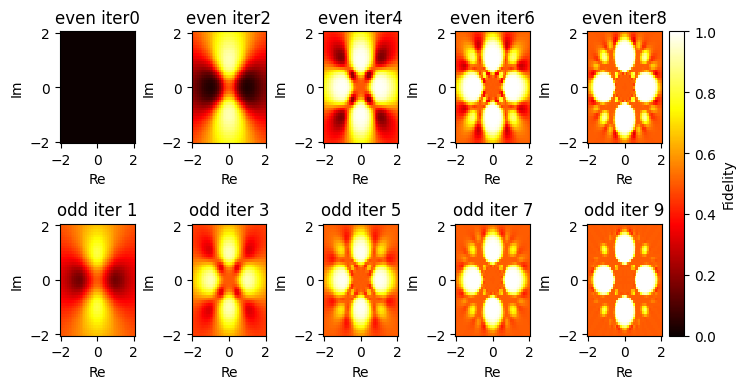

In [3]:
fig, axs = plt.subplots(2, 5,figsize=(8, 4))
lambd =0.3
#initializing the state
for c in np.arange(10):

    psi_complex = np.empty(4,dtype=complex)
    real = []
    imag = []
    f_even =[]
    f_odd =[]
    fidelity_original=[]
    fidelity = 0
    
    for y in np.arange(-2,2.1,0.1):

        real_part = y
        for i in np.arange(-2,2.1,0.1):
            imag_part = i
            psi_complex[0] = 1
            psi_complex[1] = 0
            psi_complex[2] = 0 
            psi_complex[3] = complex(real_part, imag_part) * 1
            psi_1=(psi_complex.reshape(4,))/np.linalg.norm(psi_complex)

            density_matrix_bell = np.outer(psi_1,np.conjugate(psi_1))
            den_1 = ((1-lambd)*density_matrix_bell) + (lambd*np.identity(4)/4)
            den_2 = den_1
            

             
        
            
            for i in range(c):

                     den = np.kron(den_1,den_2)

                     #performing swap operation 
                     swap_tensored =np.kron(identity,np.kron(swap,identity))
                     swaped_state= np.matmul(swap_tensored,np.matmul(den,swap_tensored.conj().T))


                     #cnot operation on swapped qubits 
                     cnot = np.kron(CNOT_matrix,CNOT_matrix)
                     state_after_cnot = np.matmul(cnot,np.matmul(swaped_state,cnot.conj().T))


                     #swapping the states back 
                     original_psi = np.matmul(swap_tensored,np.matmul(state_after_cnot,swap_tensored.conj().T))

                     #hadamard operation 
                     tensored_hadamard = np.kron(hadamard,np.kron(hadamard,np.identity(4)))
                     final_state_after_hadamard =np.matmul(tensored_hadamard,np.matmul(original_psi,tensored_hadamard.conj().T))


                     #measurement
                     projector=np.array([[1,0],[0,0]])
                     projector_tensored = np.kron(np.identity(4),np.kron(projector,projector))

                     measured = np.dot(projector_tensored,np.matmul(final_state_after_hadamard,projector_tensored.conj().T))
                     denominator = np.trace(np.matmul(final_state_after_hadamard,projector_tensored.conj().T))
                     measured = measured/denominator

                     #tracing out the measured copy
                     reshaped_measured = measured.reshape((2, 2, 2, 2, 2, 2, 2, 2))  # Reshape to 4 qubits ket and bra
                     first_copy_of_the_state = np.einsum('ijklmnop->ijmn', reshaped_measured).reshape(4,4)

                     #creating bell state
                     bell_state = (np.array([[1],[0],[0],[1]]) * (1/ np.sqrt(2))).reshape(4,)

                     #calculation of fidelity
                     fidelity = np.dot(np.conjugate(bell_state).T, np.dot(first_copy_of_the_state, bell_state))

                     den_1 = first_copy_of_the_state
                     den_2 = den_1
                
            if c%2==0:
             f_even=f_even+[fidelity]
            else:
             f_odd=f_odd+[fidelity]

            

    y = np.arange(-2, 2.1, 0.1)
    x = np.arange(-2, 2.1, 0.1)
    X, Y = np.meshgrid(x, y)
    # F_ori = np.array(fidelity_original).reshape(len(y), len(x))
    # mesh_ori = plt.pcolormesh(X, Y, np.abs(F_ori), cmap='hot', shading='auto', vmin=0, vmax=1)

    if c%2==0:
        F_even = np.array(f_even).reshape(len(y), len(x))

        mesh = axs[0,c//2].pcolormesh(X, Y, np.abs(F_even), cmap='hot', shading='auto', vmin=0, vmax=1)
        axs[0,c//2].set_title(f'even iter{c}')
        axs[0,c//2].set_xlabel('Re')  # Set x-axis label for subplot in the first column
        axs[0,c//2].set_ylabel('Im')  # Set y-axis label for subplot in the first column

        plt.title(f'even iter{c}')

    else:
        F_odd = np.array(f_odd).reshape(len(y), len(x))

        # Plot for odd iterations in the second column
        
        mesh = axs[1,c//2].pcolormesh(X, Y, np.abs(F_odd), cmap='hot', shading='auto', vmin=0, vmax=1)
        axs[1,c//2].set_title(f'odd iter {c}')
        axs[1,c//2].set_xlabel('Re')  # Set x-axis label for subplot in the second column
        axs[1,c//2].set_ylabel('Im')  # Set y-axis label for subplot in the second column
        
        plt.title(f'odd iter {c}')
        

plt.tight_layout()         
cbar = fig.colorbar(mesh, ax=axs.ravel().tolist(), orientation='vertical',pad=0.01)
cbar.set_label('Fidelity')


plt.xlabel('Re')  # Set x-axis label
plt.ylabel('Im')  # Set y-axis label


              